#Interactive Proteus serial example

##Load interactive Proteus module, physics, and numerics on the MPI tasks and solve problem

In [6]:
from proteus.iproteus import * 
from proteus import default_n,default_s,default_so
import ladr_2d_p,ladr_2d_n
from proteus import Comm
comm = Comm.get()
pList = [ladr_2d_p]
nList = [ladr_2d_n]
so = default_so
so.name = pList[0].name = "ladr_2d"
so.sList=[default_s]
so.tnList = ladr_2d_n.tnList
nList[0].multilevelLinearSolver=default_n.KSP_petsc4py
#opts.viewer='vtk'
#viewers = Viewers.viewerOn(so.name+`comm.rank()`,opts.viewer)
ns = NumericalSolution.NS_base(so,pList,nList,so.sList,opts)
ns.calculateSolution('run1')
x = ns.modelList[0].levelModelList[-1].mesh.nodeArray[:,0]
y = ns.modelList[0].levelModelList[-1].mesh.nodeArray[:,1]
triangles = ns.modelList[0].levelModelList[-1].mesh.elementNodesArray
u = ns.modelList[0].levelModelList[-1].u[0].dof
#if comm.isMaster():
#    imageList = [window.png for window in viewers.windowDict.values()]
#else:
#    imageList = []

##Combine subdomain solutions and plot

<matplotlib.tri.tricontour.TriContourSet instance at 0x7f464ec773b0>

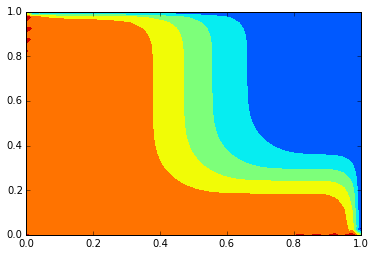

In [7]:
%matplotlib  inline
from pylab import *
tricontourf(x,y,triangles,u)

In [8]:
#png = view['imageList'][12][0]
#print png

In [9]:
#from IPython.core.display import Image
#Image(png,embed=True)